In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
original_data = pd.read_csv("original_covid_and_healthy_spectra.csv")
original_data

,400,402,405,407,410,412,415,417,420,422,...,2101,2103,2104,2105,2107,2108,2109,2111,2112,diagnostic
0,0,-0.015237,-0.030607,-0.038309,-0.039078,-0.035809,-0.031176,-0.030395,-0.033311,-0.031603,...,-0.000553,0.000118,0.000566,0.001245,0.000846,0.001106,0.001005,0.000117,0.0,Healthy
1,0,-0.012098,-0.028164,-0.035189,-0.036138,-0.031050,-0.026015,-0.027539,-0.028084,-0.027075,...,-0.000998,0.000278,-0.000123,0.000384,0.001010,0.000583,-0.000397,-0.000160,0.0,Healthy
2,0,-0.013000,-0.029058,-0.035021,-0.034994,-0.033025,-0.028413,-0.028470,-0.029737,-0.029198,...,-0.001554,0.000050,0.000866,0.000877,0.000871,0.001093,0.001058,0.000614,0.0,Healthy
3,0,-0.015728,-0.034346,-0.045140,-0.047671,-0.044334,-0.040807,-0.040474,-0.041417,-0.040699,...,-0.001541,-0.000198,0.000202,0.001023,0.000625,0.000420,0.000543,-0.000072,0.0,Healthy
4,0,-0.020355,-0.045839,-0.060556,-0.065805,-0.064988,-0.062097,-0.061955,-0.064759,-0.066886,...,-0.000088,0.000891,0.000942,0.001294,0.001878,0.001739,0.001946,0.001301,0.0,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,-0.012075,-0.015969,-0.016275,-0.015292,-0.015369,-0.016400,-0.013721,-0.014503,-0.013820,...,-0.000538,0.000050,0.001191,0.001467,0.001823,0.001420,0.001671,0.000966,0.0,SARS-CoV-2
305,0,-0.017376,-0.024656,-0.025636,-0.026982,-0.027625,-0.029134,-0.027138,-0.026919,-0.022834,...,0.000275,0.000287,0.000239,0.000755,0.001314,0.001320,0.000946,0.000392,0.0,SARS-CoV-2
306,0,-0.011666,-0.018976,-0.019419,-0.017430,-0.017057,-0.019041,-0.021120,-0.019771,-0.015616,...,0.001393,0.001246,0.000687,0.001516,0.001923,0.002260,0.001411,0.001238,0.0,SARS-CoV-2
307,0,-0.011431,-0.018292,-0.017184,-0.015339,-0.016573,-0.016317,-0.016650,-0.016017,-0.012436,...,-0.002063,-0.000858,-0.000701,-0.000713,0.000067,0.000204,-0.000403,-0.001296,0.0,SARS-CoV-2


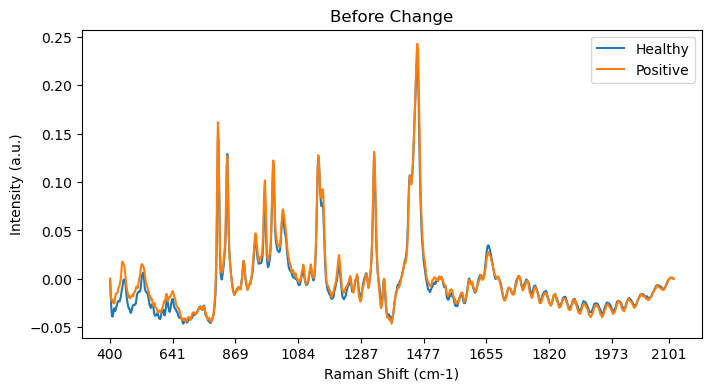

In [4]:
x_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 891]

plt.figure(figsize=(8, 4))

plt.xlabel("Raman Shift (cm-1)")
plt.ylabel("Intensity (a.u.)")
plt.title("Before Change")
plt.xticks(x_ticks)

plt.plot(original_data.iloc[0, :-1], label="Healthy")
plt.plot(original_data.iloc[300, :-1], label="Positive")

plt.legend()

In [5]:
# drop columns with zeros
for i in [400,904,1080,1251,1359,1410,1517,1647,1746]:
    processed_data = original_data.drop(str(i), axis=1)

# min-max normalisation
processed_data.iloc[:, :-1] = (original_data.iloc[:, :-1] - original_data.iloc[:, :-1].min()) / (original_data.iloc[:, :-1].max() - original_data.iloc[:, :-1].min())

print("Before processing")
print(f'Shape: {original_data.shape}')
print(f'Min: {original_data.min(axis=1).min()}')
print(f'Max: {original_data.max(axis=1).max()}')

print()

print("After")
print(f'Shape: {processed_data.shape}')
print(f'Min: {processed_data.min(axis=1).min()}')
print(f'Max: {processed_data.max(axis=1).max()}')

Before processing
Shape: (309, 901)
Min: -0.083183449
Max: 0.368493054

After
Shape: (309, 900)
Min: 0.0
Max: 1.0


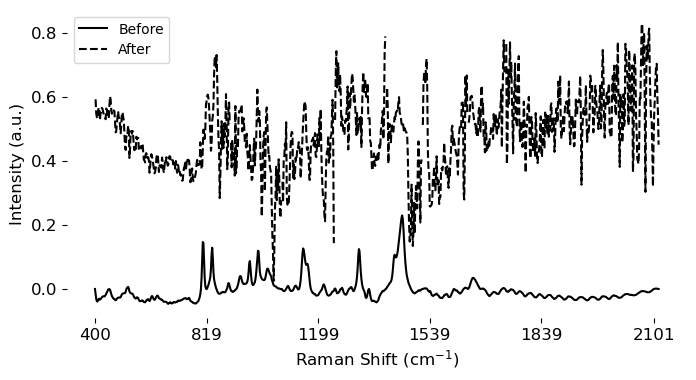

In [14]:
x_ticks = [0,  178,  178*2,  178*3, 178*4, 891]

plt.figure(figsize=(8, 4))

plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
plt.ylabel("Intensity (a.u.)", fontsize=12)
#plt.title("Positive SARS-CoV-2 sample before and after preprocessing")
plt.yticks(fontsize=12)
#plt.title("Chlorinated vs Non-Chlorinated Raman Spectra")
plt.xticks(x_ticks, fontsize=12)
#plt.ylim([-0.1, 1])
plt.box(False)

plt.plot(original_data.iloc[0, :-1], "k", label="Before")
plt.plot(processed_data.iloc[0, :-1], "k--", label="After")

plt.legend(fontsize=10)
plt.savefig("../../figs/sars_pre_and_post_min_max.png", bbox_inches='tight')

In [12]:
processed_data["classLabel"] = processed_data["diagnostic"].map({"Healthy": 0, "SARS-CoV-2": 1})
processed_data = processed_data.drop("diagnostic", axis=1)

In [13]:
processed_data["classLabel"].value_counts()

1    159
0    150
Name: classLabel, dtype: int64

In [ ]:
#processed_data.to_csv("normalised_original_covid_and_healthy_spectra.csv", index=False)